In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', size=14)          # controls default text sizes
matplotlib.rc('axes', titlesize=14)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=14)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=12)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=12)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=12)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.autolayout'] = True


def plotting(xlabel, ylabel, title = None, grid = True, legend = False, yscale = None, axfsize = 14, legendfsize = 14):
    plt.xlabel(xlabel, fontsize = axfsize)
    plt.ylabel(ylabel, fontsize = axfsize)
    plt.title(title)
    if yscale: plt.yscale(yscale)
    if grid: plt.grid(alpha =0.2)  
    if legend: plt.legend(fontsize = legendfsize)     


In [7]:
E2GeV = pd.read_csv('./2GeV.txt', header = None, skiprows=1)
E5GeV = pd.read_csv('./5GeV.txt', header = None, skiprows=1)
E10GeV = pd.read_csv('./10GeV.txt', header = None, skiprows=1)

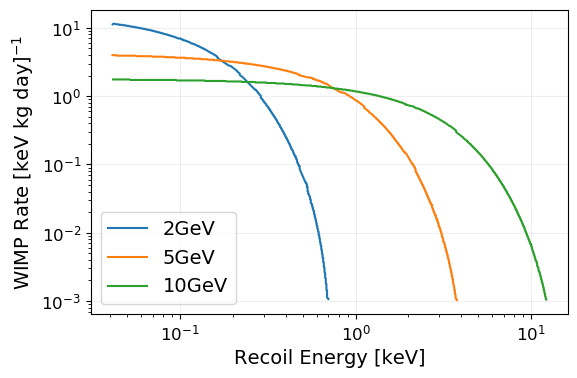

In [8]:
plt.plot(E2GeV[0], E2GeV[1], label = '2GeV')
plt.plot(E5GeV[0], E5GeV[1], label = '5GeV')
plt.plot(E10GeV[0], E10GeV[1], label = '10GeV')
plotting('Recoil Energy [keV]', 'WIMP Rate [keV kg day]$^{-1}$', yscale = 'log', legend = True)
plt.xscale('log')

In [9]:
def DC(r0, E0, Er, Md, Mt= 0.93):
    r = 4*Md*Mt/((Md+Mt)**2)
    return (r0/(E0*r)*np.exp(-Er/(E0*r)))

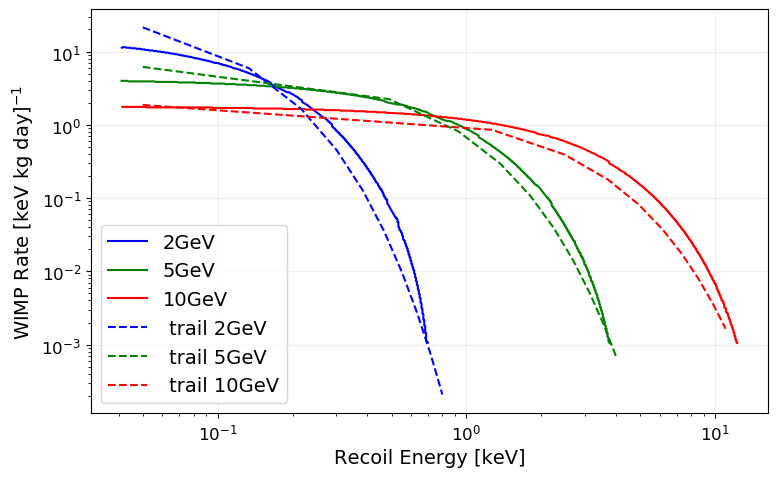

In [10]:
plt.figure(figsize=(8,5))
plt.plot(E2GeV[0], E2GeV[1], label = '2GeV', color = 'b')
plt.plot(E5GeV[0], E5GeV[1], label = '5GeV', color = 'g')
plt.plot(E10GeV[0], E10GeV[1], label = '10GeV', color = 'r')
re1 = np.linspace(0.05,0.8,10)
re2 = np.linspace(0.05,4,10)
re3 = np.linspace(0.05,11,10)
plt.plot(re1, DC(r0  = 3, E0 = 0.075, Md = 2, Mt=0.93, Er = re1), label = ' trail 2GeV', color = 'b', linestyle = '--')
plt.plot(re2, DC(r0  = 3, E0 = 0.5, Md = 2, Mt=0.93, Er = re2), label = ' trail 5GeV', color = 'g', linestyle = '--')
plt.plot(re3, DC(r0  = 3, E0 = 5, Md = 10, Mt=0.93, Er = re3), label = ' trail 10GeV', color = 'r', linestyle = '--')
plotting('Recoil Energy [keV]', 'WIMP Rate [keV kg day]$^{-1}$', yscale = 'log', legend = True)
plt.xscale('log')